In [1]:
import numpy as np
import os

In [2]:
os.system('./bcg_method ./matrix\ generator/mat ./matrix\ generator/vec 100 196 > out.txt')

0

In [3]:
array = np.loadtxt("./out.txt", skiprows=2)

In [4]:
array

array([ 0.0751249 , -0.3767    ,  1.07317   ,  0.394162  ,  0.240621  ,
       -0.738789  , -1.4515    , -1.76206   ,  0.153201  , -0.0223828 ,
       -0.143079  , -1.52647   , -0.899505  ,  0.850542  ,  0.527286  ,
        0.159249  ,  2.01012   ,  0.711426  ,  0.0418606 , -0.675951  ,
        0.560513  ,  0.069427  , -0.901416  , -0.198725  , -0.633891  ,
        0.0834935 ,  0.247399  , -0.123569  ,  0.561849  ,  1.30276   ,
       -2.8235    , -1.54393   , -0.366418  , -0.891133  , -0.834773  ,
        0.458492  ,  0.38095   , -1.5139    ,  0.302254  ,  0.552175  ,
       -0.635385  ,  0.199437  , -0.00519327,  0.584991  ,  0.872779  ,
       -0.731955  , -1.42904   , -1.0462    , -0.0811504 ,  0.476854  ,
        0.341941  ,  1.19967   ,  0.905177  ,  0.418551  ,  0.542101  ,
        1.1605    ,  1.18728   ,  2.03387   ,  1.16611   , -0.14013   ,
       -0.636468  ,  0.562937  , -0.717486  ,  0.372627  , -0.324653  ,
       -1.1915    , -0.207133  ,  0.275041  , -1.31888   , -0.66

In [5]:
with open('./out.txt', 'r') as file:
    data = file.read().rstrip().split('\n')[0]

In [6]:
np.float64(data)

0.043617

In [7]:
def run_bicg(N, max_iter):
    A = np.random.rand(N, N) + np.eye(N)
    b = np.random.rand(N)
    np.savetxt("./matrix\ generator", A)
    np.savetxt('./matrix\ generator', b)
    os.system('./bcg_method ./matrix\ generator/mat ./matrix\ generator/vec {} {} > out.txt'.format(N, max_iter))
    with open('./out.txt', 'r') as file:
        data = file.read().rstrip().split('\n')
        r_norm_str = data[0]
        seconds_str = data[1]
    r_norm = np.float64(r_norm_str)
    seconds = np.float64(seconds_str)
    solution = np.loadtxt("./out.txt", skiprows=2)
    return (r_norm, seconds, solution)

In [8]:
class BICG_tester:
    def __init__(self, N):
        self.N = N
    
    def gen_matrix(self):
        self.A = np.random.rand(self.N, self.N) + np.eye(self.N)
        self.b = np.random.rand(self.N)
        np.savetxt("./matrix\ generator", self.A)
        np.savetxt('./matrix\ generator', self.b)
        
    def run_bicg(self, max_iter):
        os.system('./bcg_method ./matrix\ generator/mat ./matrix\ generator/vec {} {} > out.txt'.format(self.N, max_iter))
        with open('./out.txt', 'r') as file:
            data = file.read().rstrip().split('\n')
            r_norm_str = data[0]
            seconds_str = data[1]
        r_norm = np.float64(r_norm_str)
        seconds = np.float64(seconds_str)
        solution = np.loadtxt("./out.txt", skiprows=2)
        return (r_norm, seconds, solution)

In [9]:
tester = BICG_tester(100)

In [10]:
tester.gen_matrix()

In [11]:
tester.run_bicg(196)

(0.043617,
 0.034604,
 array([ 0.0751249 , -0.3767    ,  1.07317   ,  0.394162  ,  0.240621  ,
        -0.738789  , -1.4515    , -1.76206   ,  0.153201  , -0.0223828 ,
        -0.143079  , -1.52647   , -0.899505  ,  0.850542  ,  0.527286  ,
         0.159249  ,  2.01012   ,  0.711426  ,  0.0418606 , -0.675951  ,
         0.560513  ,  0.069427  , -0.901416  , -0.198725  , -0.633891  ,
         0.0834935 ,  0.247399  , -0.123569  ,  0.561849  ,  1.30276   ,
        -2.8235    , -1.54393   , -0.366418  , -0.891133  , -0.834773  ,
         0.458492  ,  0.38095   , -1.5139    ,  0.302254  ,  0.552175  ,
        -0.635385  ,  0.199437  , -0.00519327,  0.584991  ,  0.872779  ,
        -0.731955  , -1.42904   , -1.0462    , -0.0811504 ,  0.476854  ,
         0.341941  ,  1.19967   ,  0.905177  ,  0.418551  ,  0.542101  ,
         1.1605    ,  1.18728   ,  2.03387   ,  1.16611   , -0.14013   ,
        -0.636468  ,  0.562937  , -0.717486  ,  0.372627  , -0.324653  ,
        -1.1915    , -0.20713

In [12]:
from tqdm import tqdm

In [30]:
r_norm_array = []
time_array = []
for N in range(1000, 5001, 1000):
    tester = BICG_tester(N)
    tester.gen_matrix()
    cur_r_norm = []
    cur_time_array = []
    for it in tqdm(range(1, 200, 10)):
        norm, time, _ = tester.run_bicg(it)
        cur_r_norm.append(norm)
        cur_time_array.append(time)
    r_norm_array.append(cur_r_norm)
    time_array.append(cur_time_array)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [05:21<00:00, 16.08s/it]


In [31]:
r_norm_np = np.array(r_norm_array)
time_np = np.array(time_array)

In [32]:
r_norm_np

array([[6.06253e+00, 3.30421e+01, 1.14810e+15, 1.38366e+16, 3.79140e+17,
        1.13537e+18, 2.96289e+17, 7.61786e+16, 1.76872e+18, 1.34162e+18,
        7.89130e+17, 1.04033e+18, 3.06982e+19, 3.16631e+18, 2.94958e+18,
        5.09311e+18, 9.29967e+19, 3.31546e+19, 6.24143e+19, 1.43921e+19],
       [6.06253e+00, 1.39047e+16, 1.25681e+16, 4.27268e+17, 1.23494e+18,
        1.29894e+18, 1.28667e+18, 1.32543e+18, 1.33230e+18, 1.03631e+18,
        9.50691e+17, 1.15324e+18, 9.53591e+17, 7.98580e+17, 7.10778e+17,
        6.13002e+17, 5.93516e+17, 5.33301e+17, 5.11424e+17, 4.47558e+17],
       [6.06253e+00, 5.10942e+16, 1.21456e+19, 1.36325e+19, 6.69370e+18,
        7.67464e+18, 8.32652e+18, 7.44053e+18, 7.31893e+18, 7.09081e+18,
        5.90693e+18, 3.20988e+18, 2.78668e+18, 3.46609e+18, 3.95365e+18,
        3.11374e+18, 3.36449e+18, 3.52905e+18, 3.58078e+18, 3.33427e+18],
       [6.06253e+00, 3.74122e+18, 5.19197e+18, 2.94079e+19, 1.56015e+20,
        8.14499e+20, 4.65066e+20, 3.99795e+20, 3

In [33]:
time_np

array([[9.95586e-03, 7.15797e-02, 1.34655e-01, 2.06285e-01, 2.80526e-01,
        3.33526e-01, 3.85995e-01, 4.55229e-01, 4.97855e-01, 5.77258e-01,
        6.27964e-01, 6.85677e-01, 7.68053e-01, 8.02798e-01, 8.68493e-01,
        9.23031e-01, 1.07983e+00, 1.08926e+00, 1.14158e+00, 1.19904e+00],
       [3.86127e-02, 2.95325e-01, 5.75837e-01, 8.80429e-01, 1.11632e+00,
        1.38217e+00, 1.64598e+00, 1.92259e+00, 2.35805e+00, 2.77539e+00,
        3.38975e+00, 2.94988e+00, 3.07196e+00, 3.67691e+00, 3.78764e+00,
        4.00790e+00, 4.46622e+00, 4.40711e+00, 4.76629e+00, 5.24161e+00],
       [1.09848e-01, 7.69839e-01, 1.42385e+00, 2.06251e+00, 2.65169e+00,
        3.21067e+00, 4.08572e+00, 4.50648e+00, 4.86965e+00, 5.61313e+00,
        6.72085e+00, 7.15733e+00, 7.59129e+00, 8.07128e+00, 9.05609e+00,
        8.95105e+00, 9.67061e+00, 1.00192e+01, 1.06196e+01, 1.14649e+01],
       [1.47904e-01, 1.22292e+00, 2.23560e+00, 3.48570e+00, 4.53447e+00,
        6.20653e+00, 7.26100e+00, 7.92192e+00, 9

In [38]:
r_norm_array_parallel = []
time_array_parallel = []
for N in range(1000, 5001, 1000):
    tester = BICG_tester(N)
    tester.gen_matrix()
    cur_r_norm_parallel = []
    cur_time_array_parallel = []
    for it in tqdm(range(1, 200, 10)):
        norm, time, _ = tester.run_bicg(it)
        cur_r_norm_parallel.append(norm)
        cur_time_array_parallel.append(time)
    r_norm_array_parallel.append(cur_r_norm_parallel)
    time_array_parallel.append(cur_time_array_parallel)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [05:58<00:00, 17.90s/it]


In [39]:
r_norm_parallel_np = np.array(r_norm_array_parallel)
time_array_parallel_np = np.array(time_array_parallel)

In [40]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

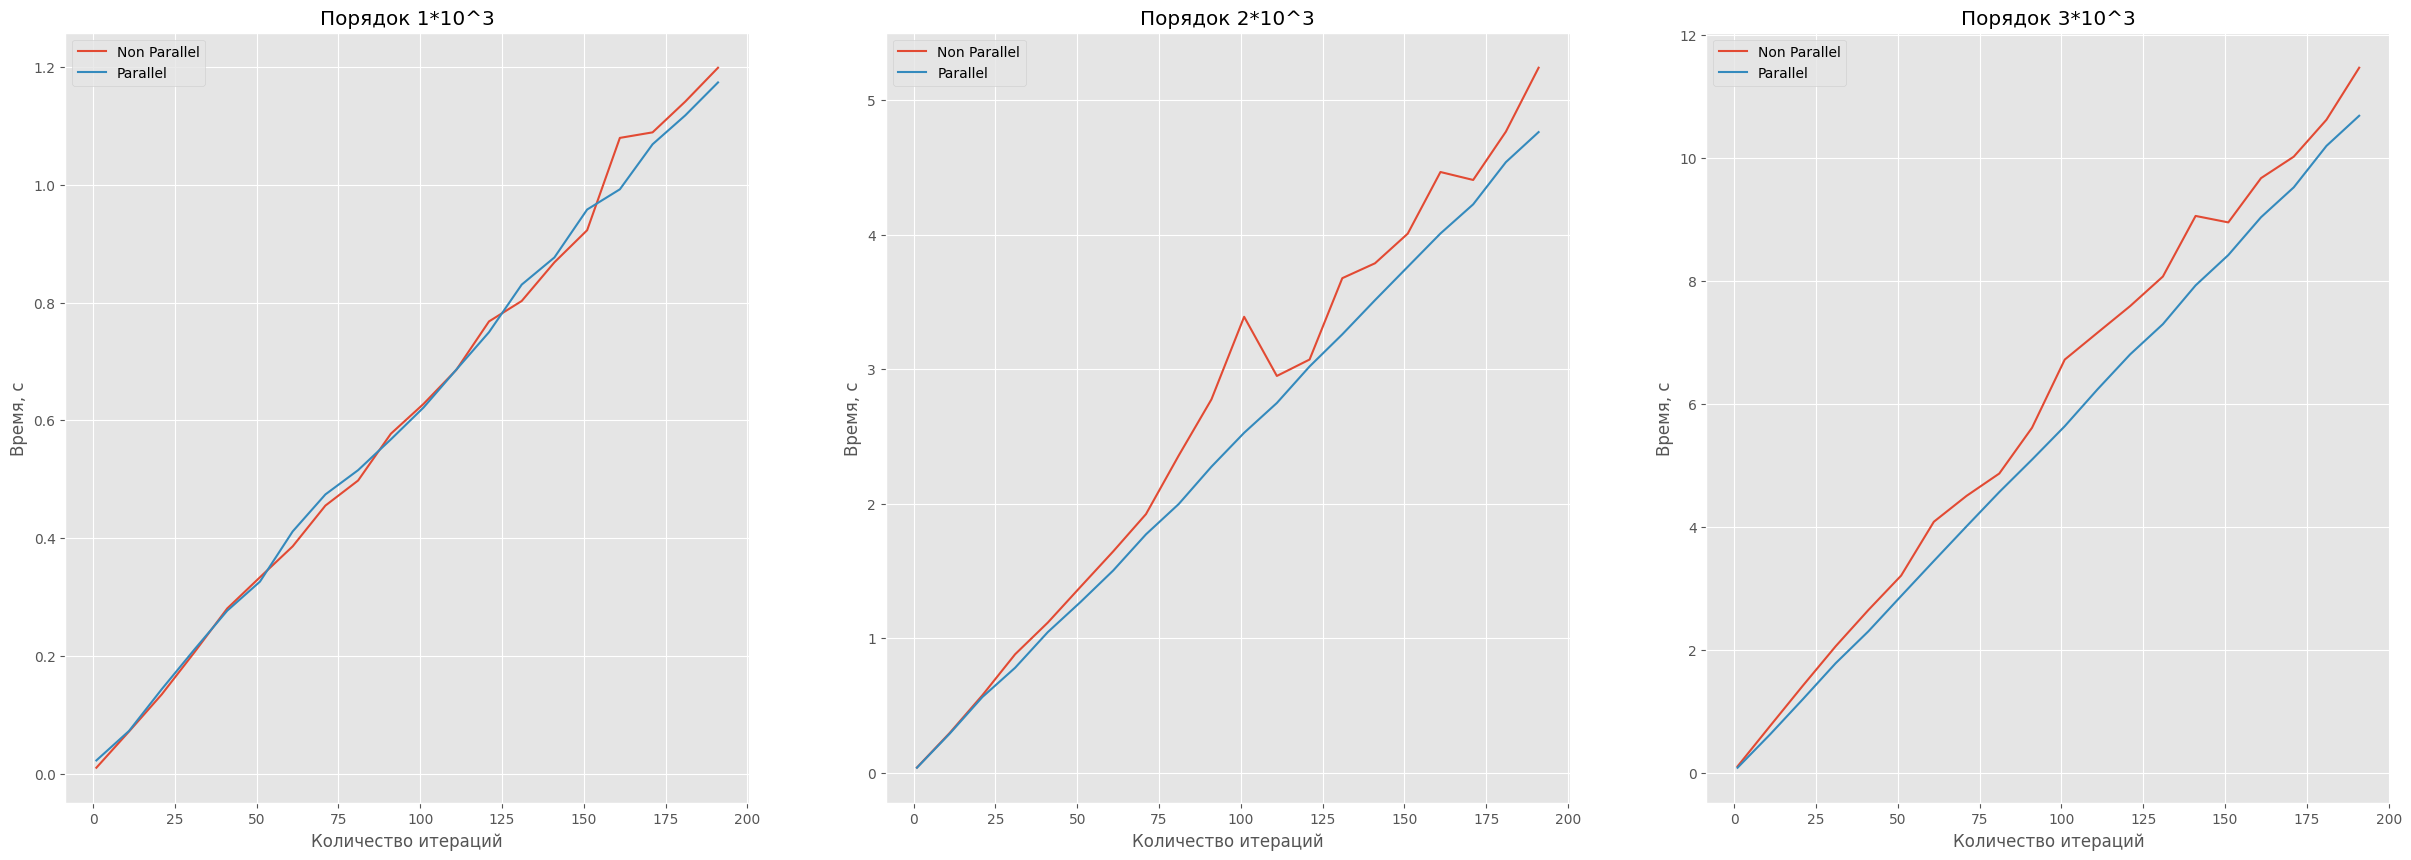

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

for i in range(3):
    time = time_np[i]
    time_parallel = time_array_parallel_np[i]
    axes[i].plot(range(1, 200, 10), time, label='Non Parallel')
    axes[i].plot(range(1, 200, 10), time_parallel, label='Parallel')
    axes[i].set_title('Порядок {}*10^3'.format(i + 1))
    axes[i].set_xlabel('Количество итераций')
    axes[i].set_ylabel('Время, с')
    axes[i].legend()